### Using yahooFinance and pandas_datareader function I have extracted the BTC-USD data from 01/01/2018 to 31/01/2022

In [1]:
# !pip install pandas_datareader

In [2]:
# !pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import yfinance as yf

In [4]:
from pandas_datareader import data as pdr
# from datetime import datetime,date

yf.pdr_override()

from datetime import datetime
startdate = datetime(2018,1,1)
enddate = datetime(2022,2,1)

data = pdr.get_data_yahoo('BTC-USD', start=startdate, end=enddate)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
2022-01-28,37128.445312,37952.878906,36211.109375,37784.332031,37784.332031,22238830523
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075


<Axes: title={'center': 'Open Price'}, xlabel='Date'>

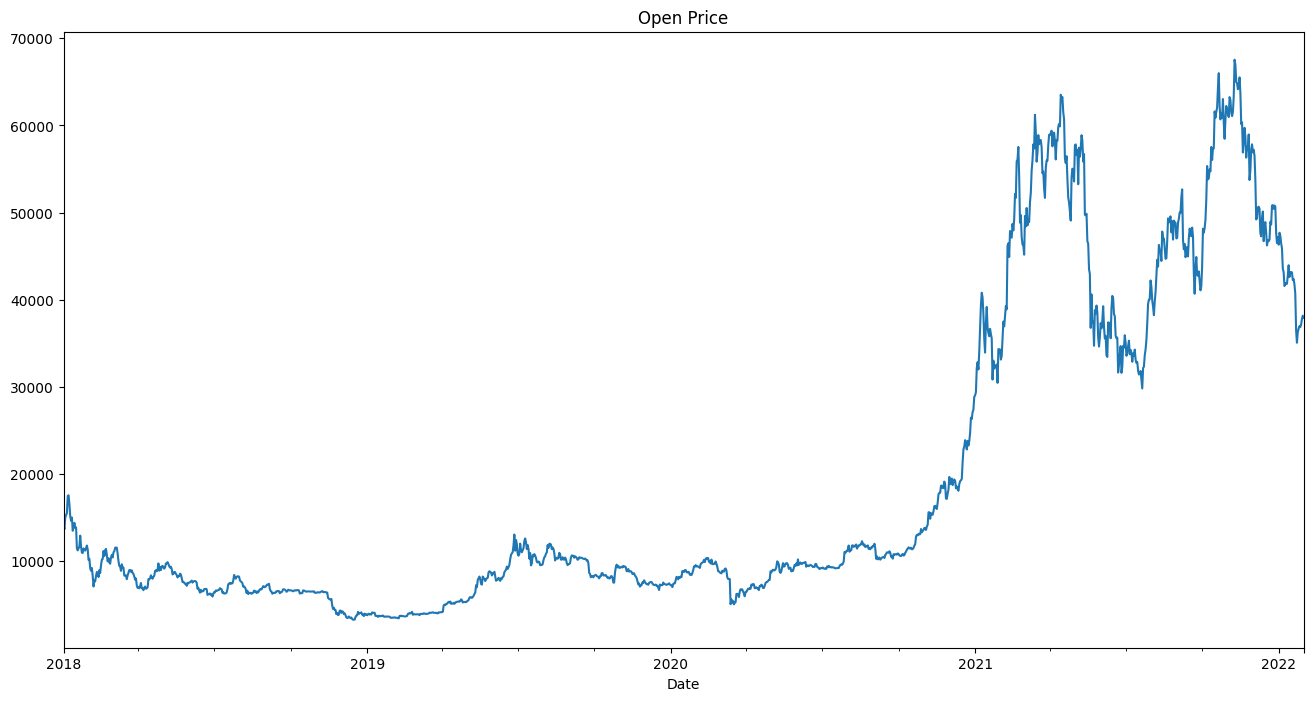

In [6]:
data['Open'].plot(label='BTC/USTD',figsize=(16,8),title='Open Price')

<Axes: title={'center': 'Volume'}, xlabel='Date'>

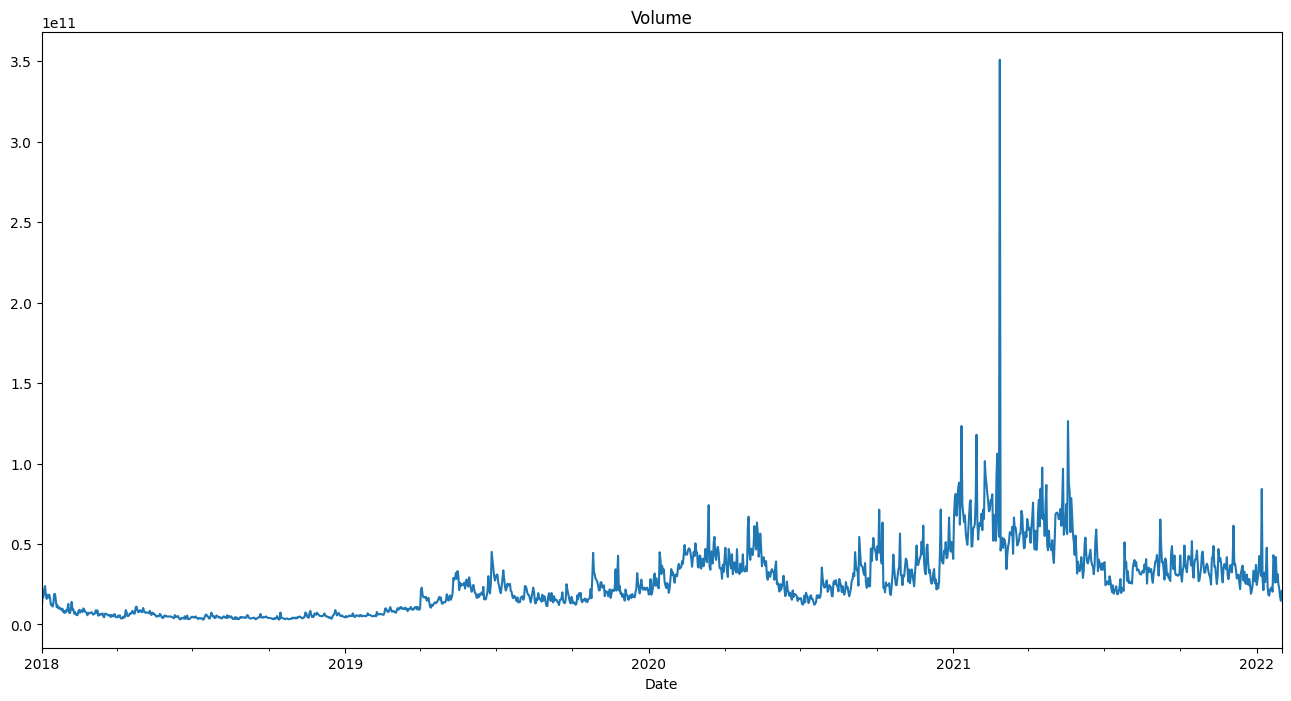

In [7]:
data['Volume'].plot(label='BTC/USTD',figsize=(16,8),title='Volume')

In [8]:
data['Total Traded'] = data['Open']*data['Volume']

<Axes: title={'center': 'Total Traded'}, xlabel='Date'>

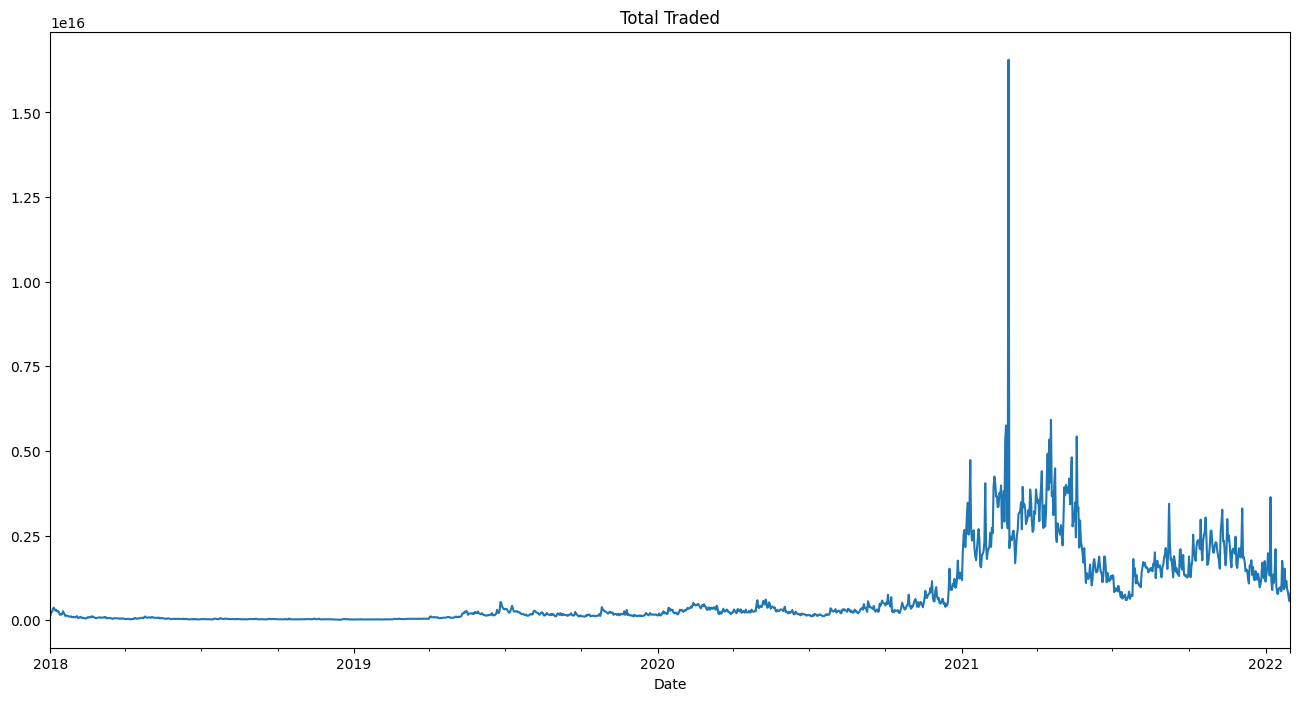

In [9]:
data['Total Traded'].plot(label='Total Traded',figsize=(16,8) , title= "Total Traded")

<Axes: title={'center': 'MA50/MA200'}, xlabel='Date'>

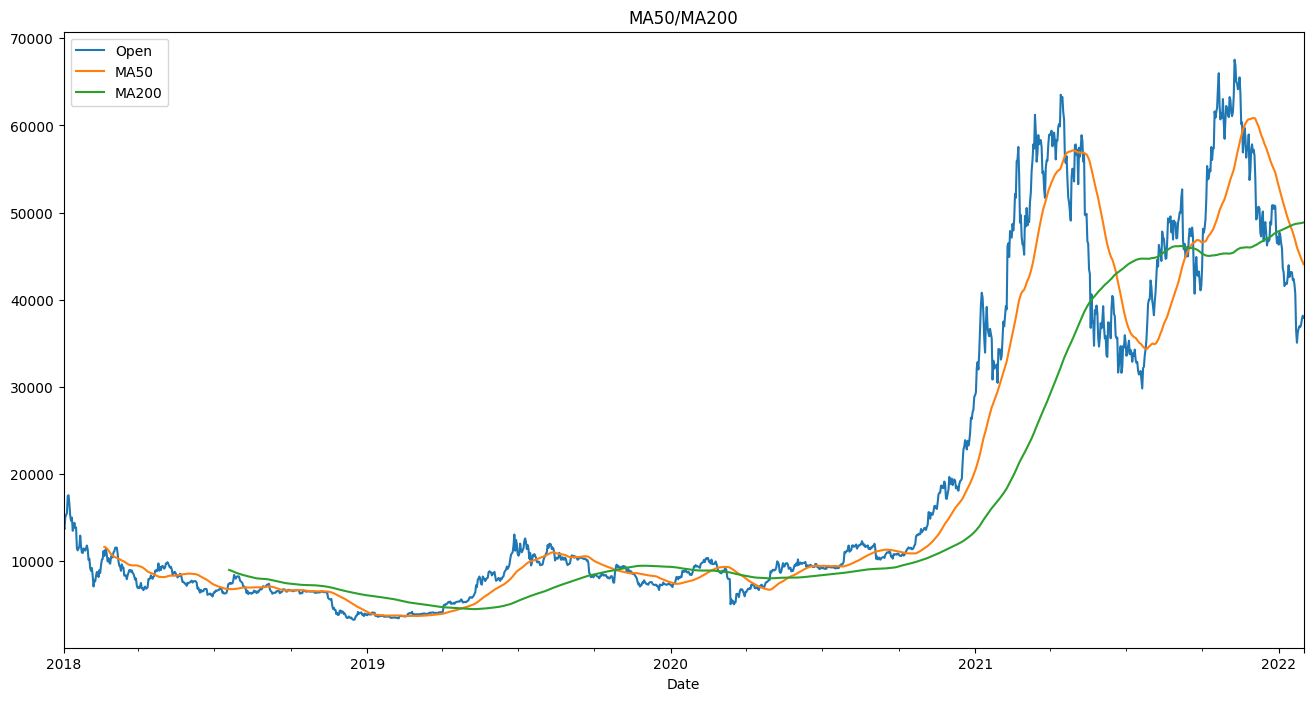

In [10]:
data['MA50'] = data['Open'].rolling(50).mean()
data['MA200'] = data['Open'].rolling(200).mean()
data[['Open','MA50','MA200']].plot(label='BTC/USDT',figsize=(16,8), title="MA50/MA200")

# Daily Percentage Change

First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:
    
returns = (price at T/price at T-1) -1

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [11]:
data['returns'] = (data['Close'] / data['Close'].shift(1) ) - 1
data.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,1.452315e+14,NaN,NaN,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,2.295349e+14,NaN,NaN,0.097011
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,2.527107e+14,NaN,NaN,0.014611
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,3.326447e+14,NaN,NaN,0.026196
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,3.689904e+14,NaN,NaN,0.117333


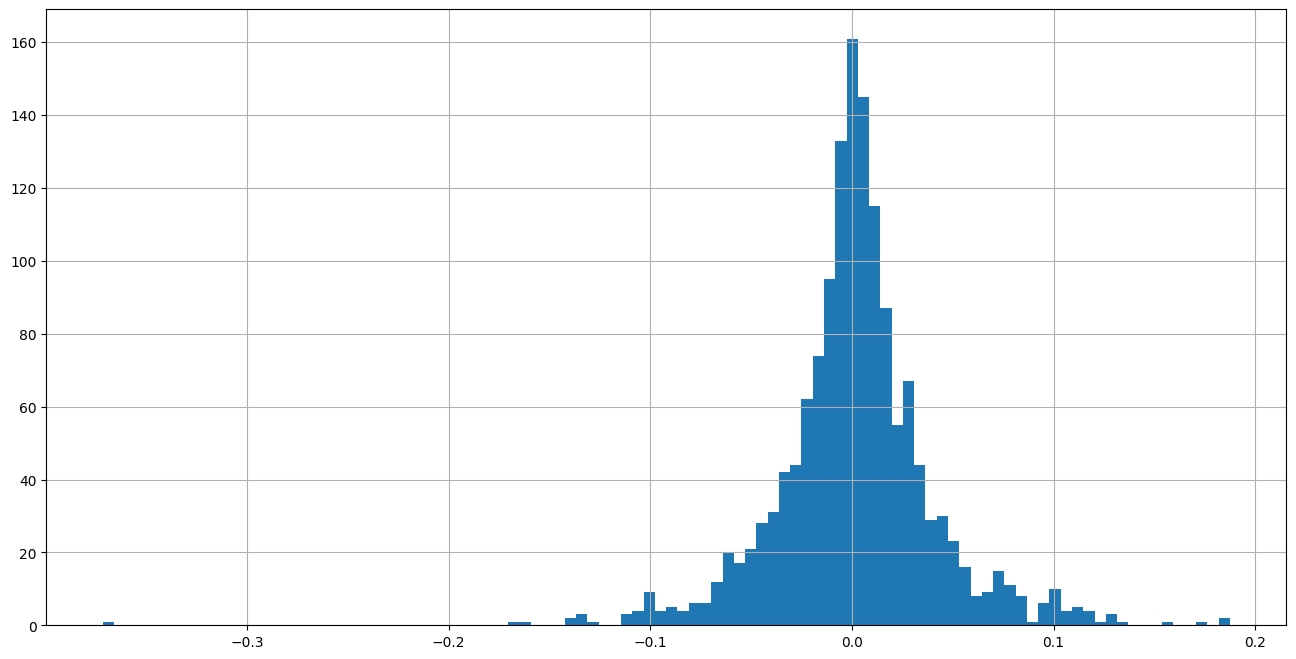

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
data['returns'].hist(bins=100)
plt.show()

<Axes: ylabel='Density'>

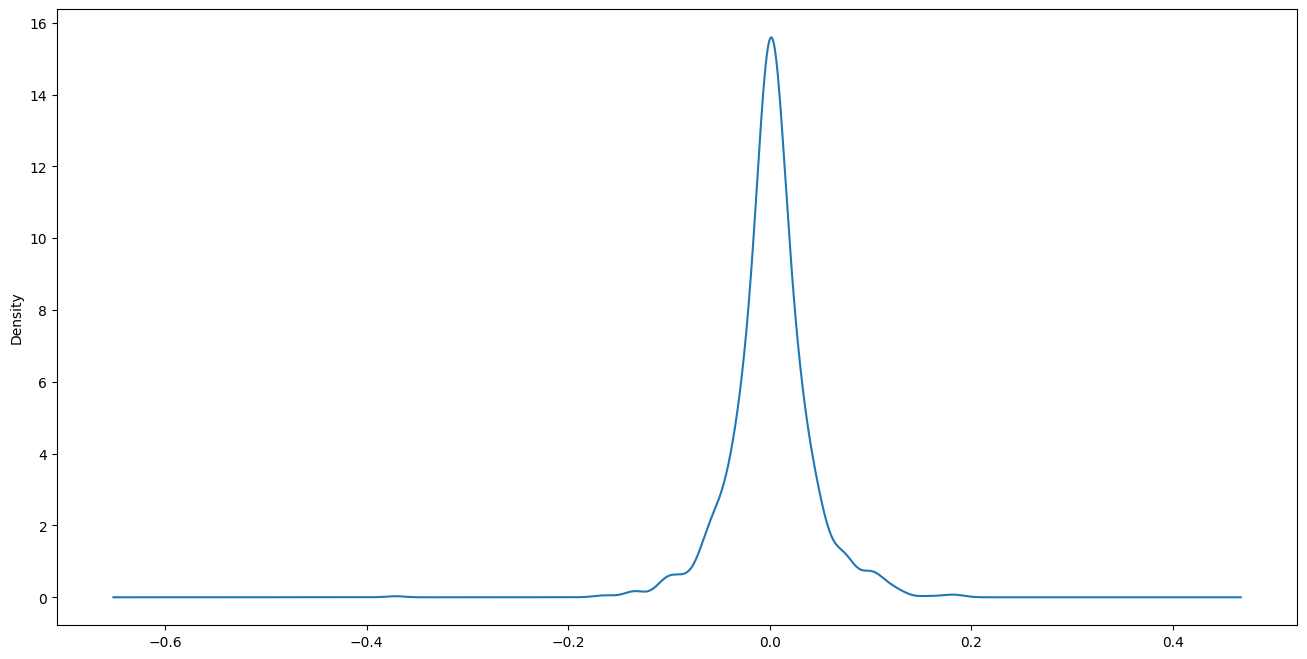

In [13]:
data['returns'].plot(kind='kde',label='BTC/USDT',figsize=(16,8))

In [14]:
data['Cumulative Return'] = (1 + data['returns']).cumprod()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,1.452315e+14,NaN,NaN,NaN,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,2.295349e+14,NaN,NaN,0.097011,1.097011
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,2.527107e+14,NaN,NaN,0.014611,1.113039
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,3.326447e+14,NaN,NaN,0.026196,1.142196
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,3.689904e+14,NaN,NaN,0.117333,1.276213


<Axes: title={'center': 'Cumulative Return'}, xlabel='Date'>

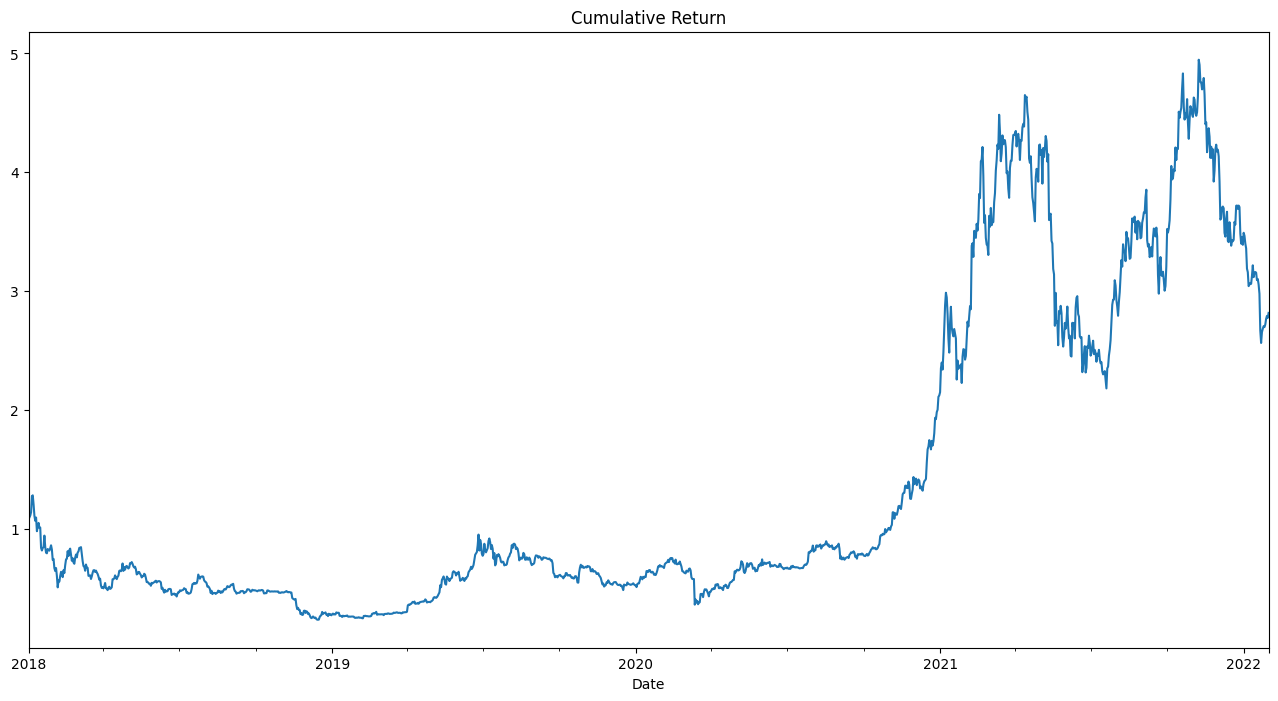

In [15]:
data['Cumulative Return'].plot(label='BTC',figsize=(16,8),title='Cumulative Return')

# the Idea is to use ARIMA and SARIMA test to best make the pridiction

In [16]:
!pip install statsmodels


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip install pmdarima


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# Create Training and Test
train = data["Open"][:1300]
test = data["Open"][1300:]

In [19]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21272.788, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21283.100, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21274.805, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21276.264, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21281.434, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21266.835, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=21269.049, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=21268.375, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21268.247, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21266.254, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=21267.836, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=21268.429, Time=0.52 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=21267.784, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=21269.908, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0

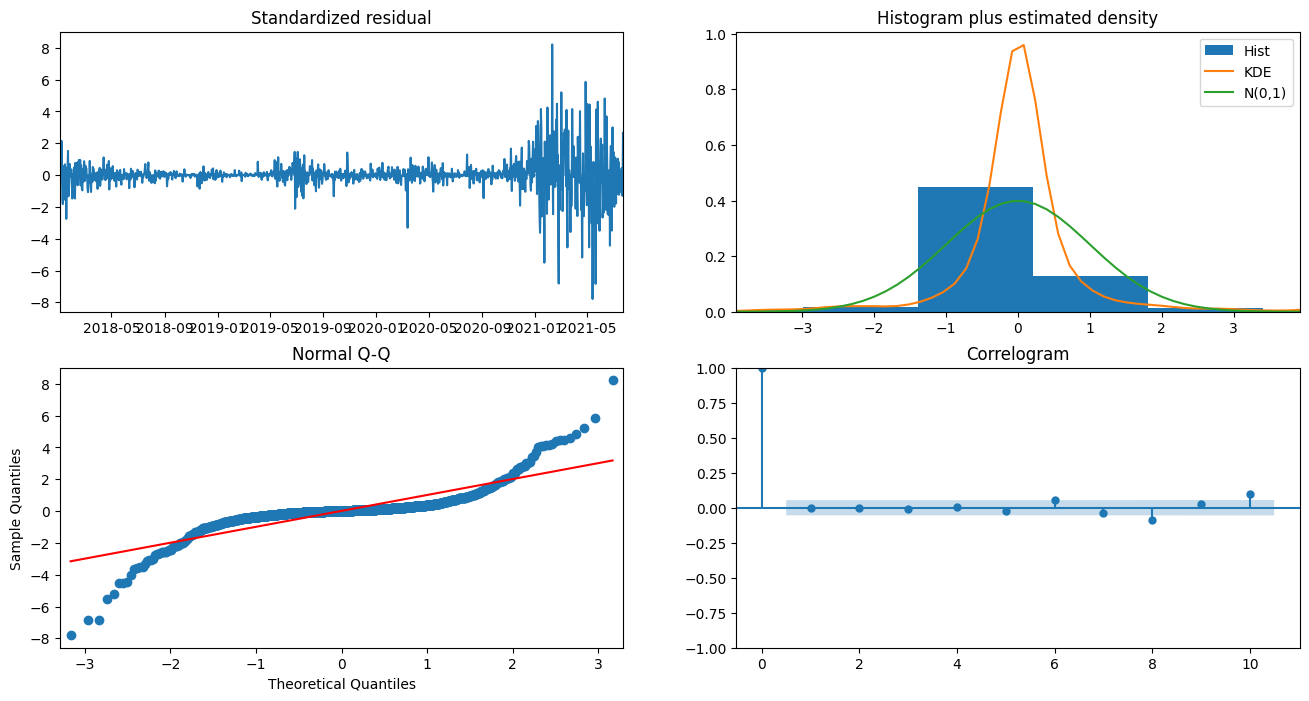

In [20]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1300
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -10628.209
Date:                Thu, 04 Jan 2024   AIC                          21264.418
Time:                        16:20:37   BIC                          21285.096
Sample:                    01-01-2018   HQIC                         21272.177
                         - 07-23-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5416      0.092      5.888      0.000       0.361       0.722
ma.L1         -0.6274      0.090     -6.937      0.000      -0.805      -0.450
ma.L2          0.1299      0.013     10.356      0.0

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


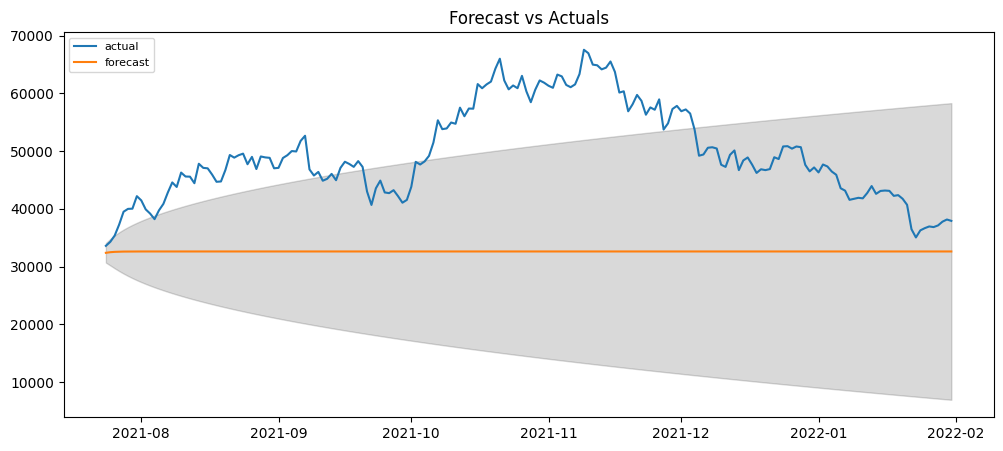

accuracy of the model is 67.5105409357579%


In [21]:
modelARIMAX = sm.tsa.statespace.SARIMAX(train,order=(1,1,2), seasonal_order=(0,0,0,0))
resultsARIMAX = modelARIMAX.fit()
print(resultsARIMAX.summary())

result2 = resultsARIMAX.get_forecast(len(test), alpha =0.05).summary_frame()

fc_seriesARIMAX = pd.Series(result2['mean'].values, index=test.index)
lower_series = pd.Series(result2['mean_ci_lower'].values, index=test.index)
upper_series = pd.Series(result2['mean_ci_upper'].values, index=test.index)


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test, label='actual')
plt.plot(fc_seriesARIMAX, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


forecast = fc_seriesARIMAX
actual = test
mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
print("accuracy of the model is "+ str((1-mape)*100) + "%")

In [22]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.10 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=24408.007, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=21623.505, Time=2.97 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=23326.952, Time=2.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=24409.240, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=22159.923, Time=0.61 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=21543.922, Time=8.19 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=19.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.27 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=24381.603, Time=3.72 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=21541.223, Time=10.73 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=21624.226, Time=3.72 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.36 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=21458.360, Time=5.25 sec
 ARIMA(2,0,0)(0,1,1)[12] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1300
Model:             SARIMAX(3, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood              -10674.780
Date:                                 Thu, 04 Jan 2024   AIC                          21363.560
Time:                                         16:23:59   BIC                          21399.686
Sample:                                     01-01-2018   HQIC                         21377.121
                                          - 07-23-2021                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -20.6683      4.237     -4.878      0.000     -28.972     -12.364
ar.L1          0.9794      0.020     50.147      0.000       0.941       1.018
ar.L2          0.1005      0.026      3.801      0.000       0.049       0.152
ar.L3         -0.0800      0.019     -4.199      0.000      -0.117      -0.043
ma.S.L12      -0.9532      0.015    -62.171      0.000      -0.983      -0.923
ma.S.L24       0.1042      0.015      6.910      0.000       0.075       0.134
sigma2      1.064e+06   2.06e+04     51.621      0.000    1.02e+06     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.45   Jarque-Bera (JB):             16079.53
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               6.10   Skew:                            -0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.18e+14. Standard errors may be unstable.
"""

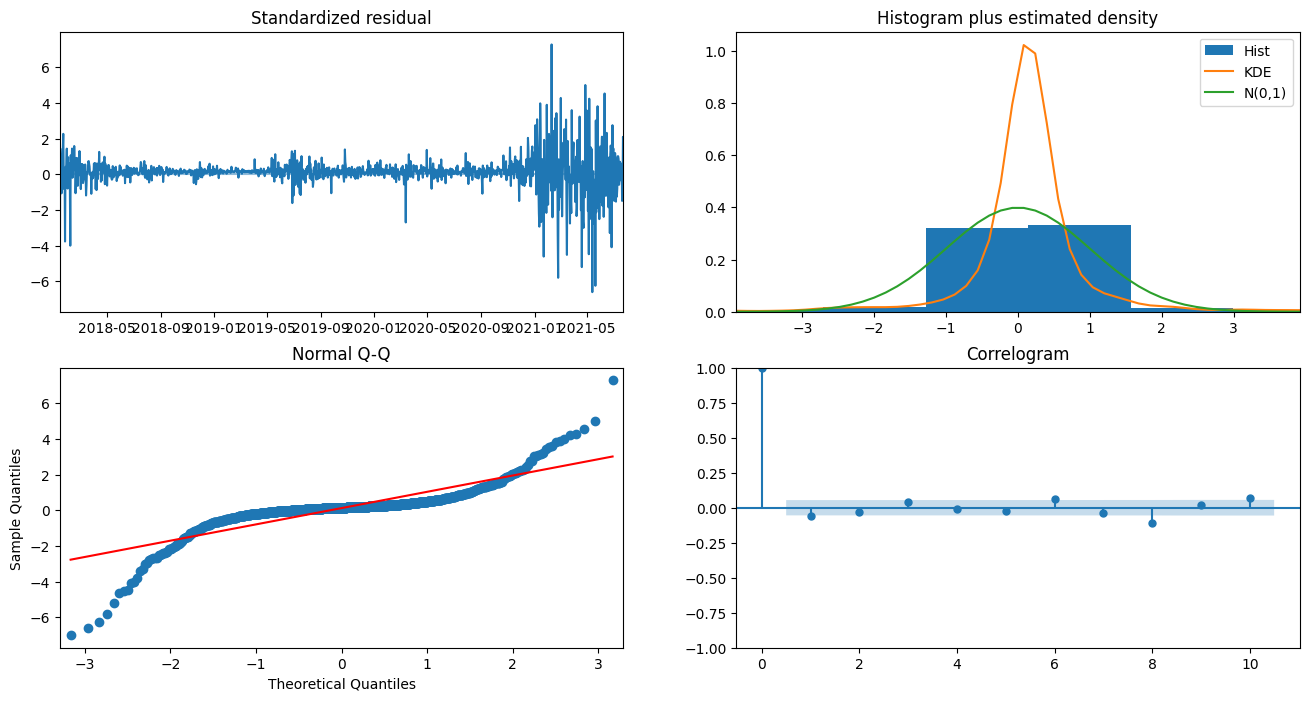

In [23]:
smodel.plot_diagnostics(figsize=(16,8))
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Open   No. Observations:                 1300
Model:             SARIMAX(3, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood              -10612.130
Date:                                 Thu, 04 Jan 2024   AIC                          21236.261
Time:                                         16:24:15   BIC                          21267.226
Sample:                                     01-01-2018   HQIC                         21247.884
                                          - 07-23-2021                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9316      0.001   1592.290      0.000       0.930       0

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


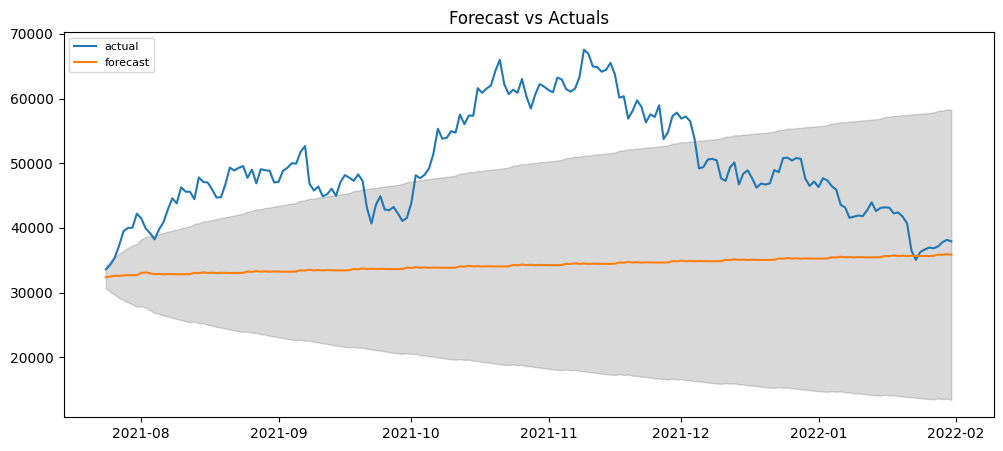

accuracy of the model is 70.79627184783726%


In [24]:
modelSARIMAX = sm.tsa.statespace.SARIMAX(train,order=(3,0,0), seasonal_order=(0,1,2,12))
resultsSARIMAX = modelSARIMAX.fit()
print(resultsSARIMAX.summary())

result1 = resultsSARIMAX.get_forecast(len(test), alpha =0.05).summary_frame()
# print(result)

fc_seriesSARIMAX = pd.Series(result1['mean'].values, index=test.index)
lower_series = pd.Series(result1['mean_ci_lower'].values, index=test.index)
upper_series = pd.Series(result1['mean_ci_upper'].values, index=test.index)


# Plot
plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_seriesSARIMAX, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


forecast = fc_seriesSARIMAX
actual = test
mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
print("accuracy of the model is "+ str((1-mape)*100) + "%")